In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="darkgrid")

In [4]:
df = pd.read_csv('Pokemon.csv')

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
len(df)

800

In [7]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [8]:
df.drop('Total', inplace=True, axis=1)

In [9]:
df.columns = ['#', 'Nom', 'Tipus1', 'Tipus2', 'HP', 'Atac', 'Defensa', 'SPA', 'SPD', 'Velocitat', 'Gen', 'Legendari']

In [10]:
df.head()

,#,Nom,Tipus1,Tipus2,HP,Atac,Defensa,SPA,SPD,Velocitat,Gen,Legendari
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


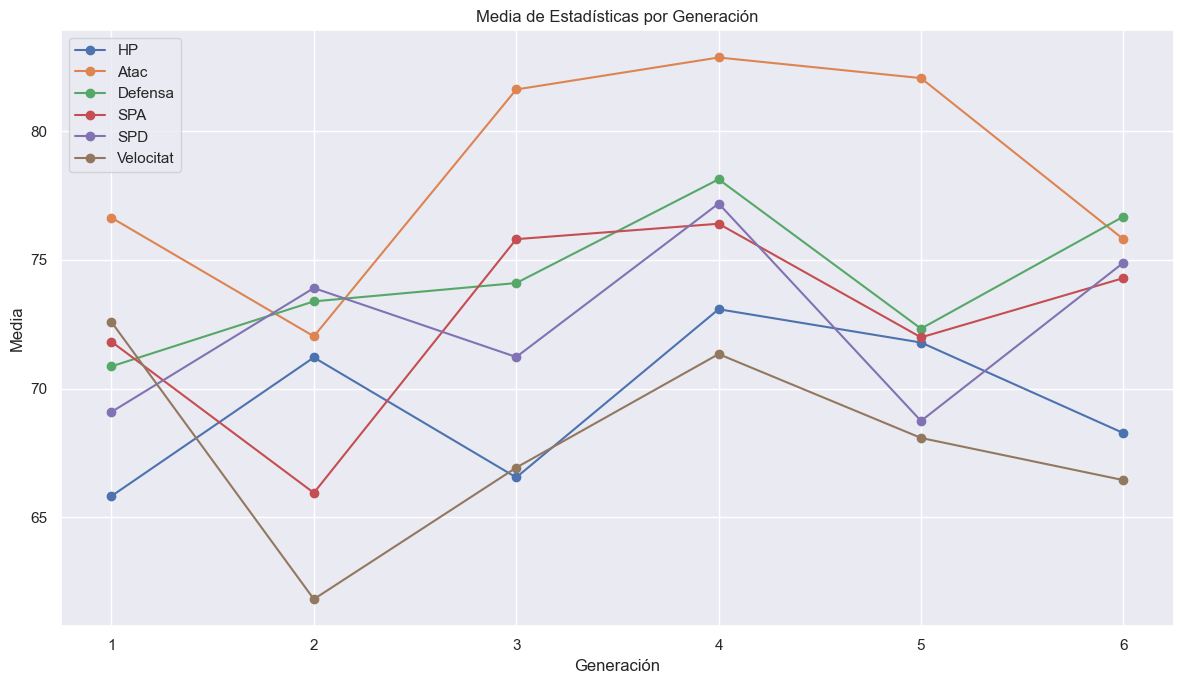

In [11]:
mitjanes_per_gen = df.groupby('Gen')[['HP', 'Atac', 'Defensa', 'SPA', 'SPD', 'Velocitat']].mean()

#Creamos el gráfico
plt.figure(figsize=(12, 7))
for columna in mitjanes_per_gen.columns:
    plt.plot(mitjanes_per_gen.index, mitjanes_per_gen[columna], marker='o', label=columna)

#Configuramos el gráfico
plt.title('Media de Estadísticas por Generación')
plt.xlabel('Generación')
plt.ylabel('Media')
plt.xticks(mitjanes_per_gen.index)  
plt.grid(True)

# Añadir la leyenda
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

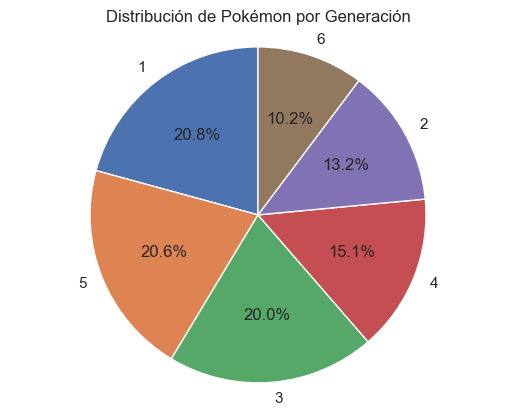

In [12]:
generation_counts = df['Gen'].value_counts()

plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Pokémon por Generación')
plt.axis('equal')
plt.show()

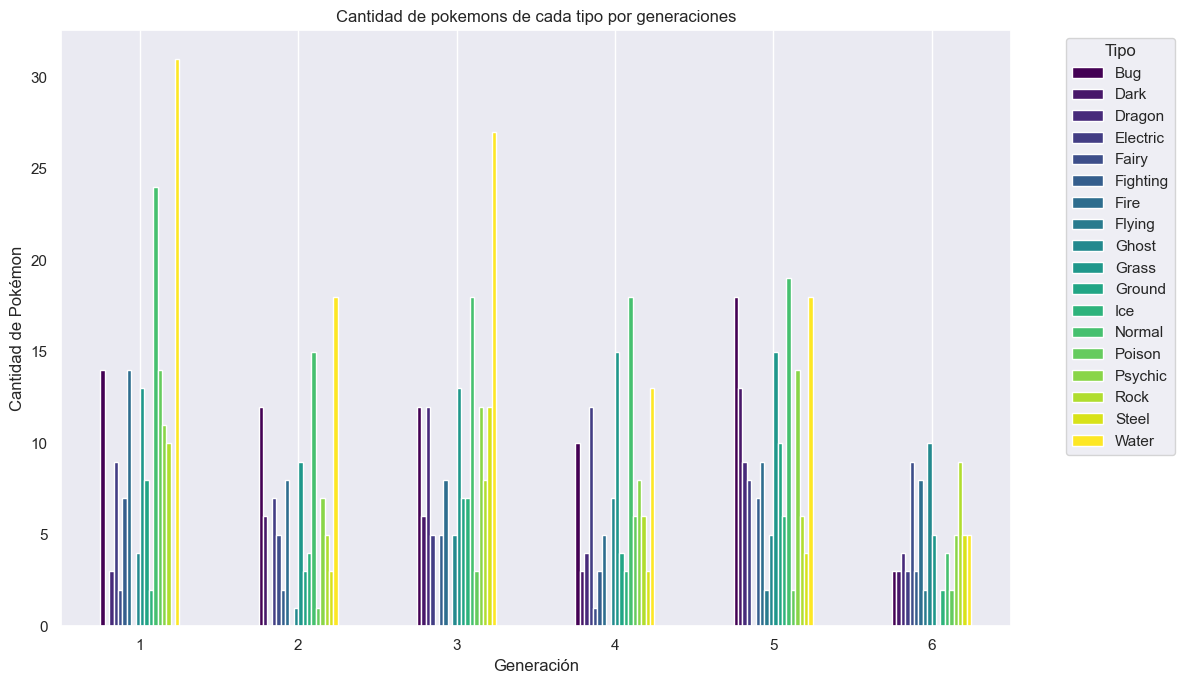

In [13]:
# Contar la cantidad de Pokémon por Tipus1 y generación
conteo = df.groupby(['Gen', 'Tipus1']).size().unstack(fill_value=0)

# Crear el gráfico de barras
conteo.plot(kind='bar', figsize=(12, 7), colormap='viridis')

# Configurar el gráfico
plt.title('Cantidad de pokemons de cada tipo por generaciones')
plt.xlabel('Generación')
plt.ylabel('Cantidad de Pokémon')
plt.xticks(rotation=0)
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

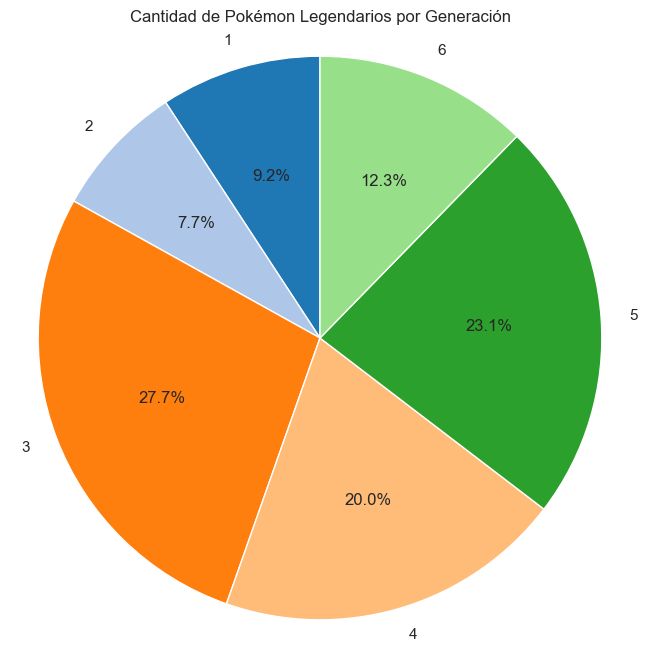

In [14]:
# Filtrar los Pokémon legendarios
legendarios_por_generacion = df[df['Legendari'] == True].groupby('Gen').size()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(legendarios_por_generacion, labels=legendarios_por_generacion.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

# Configurar el gráfico
plt.title('Cantidad de Pokémon Legendarios por Generación')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

# Mostrar el gráfico
plt.show()